# 3.1 Colour based segmentation
This part consists of using colour based information
to segment individual images from a pumpkin field.
The segmented images should end up having a black
background with smaller white objects on top.

## Exercise 3.1.1
Annotate some pumpkins in a test image and extract information about the average pumpkin colour
in the annotated pixels. Calculate both mean value
and standard variation. Use the following two colour
spaces: RGB and CieLAB. Finally try to visualise
the distribution of colour values.

### BGR

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_true = cv2.imread("Output/1/1/BGR/Ground_true_EB-02-660_0594_0326.JPG")

img = cv2.imread('Images/EB-02-660_0594_0326.JPG')
cv2.imwrite("Output/1/1/BGR/img.png", img)

# lower bound and upper bound for red color
lower_bound = np.array([0, 0, 250])
upper_bound = np.array([0, 0, 255])

# Find the colors within the boundaries
mask = cv2.inRange(img_true, lower_bound, upper_bound)
cv2.imwrite("output/1/1/BGR/mask.png", mask)
mask_pixels = np.reshape(mask, (-1))

img = cv2.bitwise_and(img, img, mask=mask)
pixels = np.reshape(img, (-1, 3))
cv2.imwrite("output/1/1/BGR/RGB.png", img)

# Mean and standard deviation
mean, std = cv2.meanStdDev(img, mask=mask)
print(f"Mean color values of the annotated pixels:\n {mean}")
print(f"Standard deviation of color values of the annotated pixels:\n {std}")

# Covariance
cov = np.cov(pixels.transpose(), aweights=mask_pixels)
print(f"Covariance matrix of color values of the annotated pixels:\n {cov}")

# Save the parameters
np.savetxt("Output/1/1/BGR/lower.txt", mean-std, delimiter=' ', fmt='%1.4f')
np.savetxt("Output/1/1/BGR/upper.txt", mean+std, delimiter=' ', fmt='%1.4f')
np.savetxt("Output/1/1/BGR/mean.txt", mean, delimiter=' ', fmt='%1.4f')


# Test the output
img = cv2.imread('Images/EB-02-660_0594_0344.JPG')
mask = cv2.inRange(img, mean-std, mean+std)
img_test = cv2.bitwise_and(img, img, mask=mask)
cv2.imwrite("Output/1/1/BGR/test.png", img_test)

# Show the histogram
colors = ['b', 'g', 'r']
for dim in range(img_test.ndim):
    data = np.reshape(img_test[:, :, dim], (-1))
    plt.hist(data[data != 0], bins=255, color=colors[dim], alpha=0.5)
plt.savefig("Output/1/1/BGR/histogram.png")
plt.close()


Mean color values of the annotated pixels:
 [[ 46.41416428]
 [150.11533625]
 [230.19802827]]
Standard deviation of color values of the annotated pixels:
 [[21.71128969]
 [16.11388805]
 [17.11028936]]
Covariance matrix of color values of the annotated pixels:
 [[471.40381144 205.71747089 131.0308569 ]
 [205.71747089 259.6704494  231.02876867]
 [131.0308569  231.02876867 292.77672851]]


### CieLAB

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_true = cv2.imread('Output/1/1/CieLAB/Ground_true_EB-02-660_0594_0326.JPG')
img = cv2.imread('Images/EB-02-660_0594_0326.JPG')

# lower bound and upper bound for red color
lower_bound = np.array([0, 0, 250])
upper_bound = np.array([0, 0, 255])

# Find the colors within the boundaries
mask = cv2.inRange(img_true, lower_bound, upper_bound)
cv2.imwrite("Output/1/1/CieLAB/mask.png", mask)
mask_pixels = np.reshape(mask, (-1))

img = cv2.bitwise_and(img, img, mask=mask)
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
pixels = np.reshape(img, (-1, 3))
cv2.imwrite("Output/1/1/CieLAB/CieLAB.png", img)

# Mean and standard deviation
mean, std = cv2.meanStdDev(img, mask=mask)
print(f"Mean color values of the annotated pixels:\n {mean}")
print(f"Standard deviation of color values of the annotated pixels:\n {std}")

# Covariance
cov = np.cov(pixels.transpose(), aweights=mask_pixels)
print(f"Covariance matrix of color values of the annotated pixels:\n {cov}")

# Save the parameters
np.savetxt("Output/1/1/CieLAB/lower.txt", mean-std, delimiter=' ', fmt='%1.4f')
np.savetxt("Output/1/1/CieLAB/upper.txt", mean+std, delimiter=' ', fmt='%1.4f')
np.savetxt("Output/1/1/CieLAB/mean.txt", mean, delimiter=' ', fmt='%1.4f')

# Test the output
img = cv2.imread('Images/EB-02-660_0594_0344.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
mask = cv2.inRange(img, mean-std, mean+std)
img_test = cv2.bitwise_and(img, img, mask=mask)
cv2.imwrite("Output/1/1/CieLAB/test.png", img_test)

# Show the histogram
colors = ['b', 'g', 'r']
for dim in range(img_test.ndim):
    data = np.reshape(img_test[:, :, dim], (-1))
    plt.hist(data[data != 0], bins=255, color=colors[dim], alpha=0.5)
plt.savefig("Output/1/1/CieLAB/histogram.png")
plt.close()


Mean color values of the annotated pixels:
 [[175.31995372]
 [150.28308435]
 [190.01353051]]
Standard deviation of color values of the annotated pixels:
 [[14.39882563]
 [ 4.32889583]
 [ 7.2355212 ]]
Covariance matrix of color values of the annotated pixels:
 [[207.33660837 -19.72096074  25.87952376]
 [-19.72096074  18.74028175   6.27398643]
 [ 25.87952376   6.27398643  52.35540042]]


## Exercise 3.1.2
Segment the orange pumpkins from the background
using color information. Experiment with the following segmentation methods
1. inRange with RGB values
2. inRange with CieLAB values
3. Distance in RGB space to a reference colour
4. (HLS)

In [ ]:
import cv2
import numpy as np

# Test RGB
img = cv2.imread('Images/EB-02-660_0594_0344.JPG')
lower_bound = np.loadtxt("Output/1/1/BGR/lower.txt", delimiter=' ')
upper_bound = np.loadtxt("Output/1/1/BGR/upper.txt", delimiter=' ')
mask = cv2.inRange(img, lower_bound, upper_bound)
img_test = cv2.bitwise_and(img, img, mask=mask)
cv2.imwrite("Output/1/2/BGR.png", img_test)

# Test the output
img = cv2.imread('Images/EB-02-660_0594_0344.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
lower_bound = np.loadtxt(f"Output/1/1/CieLAB/lower.txt", delimiter=' ')
upper_bound = np.loadtxt(f"Output/1/1/CieLAB/upper.txt", delimiter=' ')
mask = cv2.inRange(img, lower_bound, upper_bound)
img_test = cv2.bitwise_and(img, img, mask=mask)
cv2.imwrite("Output/1/2/CieLAB.png", img_test)


# Distance in RGB space to a reference color
ref = np.loadtxt(f"Output/1/1/BGR/mean.txt", delimiter=' ')
pixels = np.reshape(img, (-1, 3))
cov = np.cov(pixels.transpose())
diff = pixels - np.repeat([ref], np.ma.size(pixels,axis=0),axis=0)
# Calculate the distances
mahalanobis = np.sqrt(np.sum(np.dot(diff,np.linalg.inv(cov)) *diff , axis=1))  
euclidian = np.sqrt(np.sum(diff * diff, axis=1))
# Reshaping to image dimension
mahalanobis_img = np.reshape(mahalanobis,(img.shape[0],img.shape[1]))
euclidian_img = np.reshape(euclidian,(img.shape[0],img.shape[1]))
# Scaling to 8 bit greyscale image
scaled_mahalanobis_img = 255*mahalanobis_img/np.max(mahalanobis_img)
scaled_euclidian_img = 255*euclidian_img/np.max(euclidian_img)
# Saving scaled images
cv2.imwrite("Output/1/2/euclidian_dist_map.png", scaled_euclidian_img)
cv2.imwrite("Output/1/2/mahalanobis_dist_map.png", scaled_mahalanobis_img)

# Setting up a threshhold for mahalanobis
ret,threshold_img = cv2.threshold(scaled_mahalanobis_img,135,255, cv2.THRESH_BINARY_INV)
threshold_img = threshold_img.astype(np.uint8)
cv2.imwrite("Output/1/2/mahalanobis_segmented.png", threshold_img)



True

## Exercise 3.1.3
Choose one segmentation method to use for the rest
of the mini-project.

In [ ]:
import cv2
import numpy as np

BGR = "BGR"
CieLAB = "CieLAB"

def segmentation(img: np.ndarray, method: str = BGR) -> np.ndarray:
    """Segmentation of an image to find a color spectrum

    Args:
        img (np.ndarray): Image used for segmentation
        type (str, optional): Type of image used for segmentation. Defaults to BGR.

    Returns:
        np.ndarray: Image containing the orange color
    """

    # Fetch the lower and upper bounds
    lower_bound = np.loadtxt(f"Output/1/1/{method}/lower.txt", delimiter=' ')
    upper_bound = np.loadtxt(f"Output/1/1/{method}/upper.txt", delimiter=' ')

    # Copy the image
    img_tmp = img.copy()

    if method == CieLAB:
        img_tmp = cv2.cvtColor(img_tmp, cv2.COLOR_BGR2LAB)

    mask = cv2.inRange(img_tmp, lower_bound, upper_bound)
    return cv2.bitwise_and(img_tmp, img_tmp, mask=mask)

# Test the segmentation
img = cv2.imread('Images/EB-02-660_0594_0344.JPG')
img_test = segmentation(img)
cv2.imwrite("Output/1/3/BGR.png", img_test)
img_test = segmentation(img, method= "CieLAB")
cv2.imwrite("Output/1/3/CieLAB.png", img_test)


True

# 3.2 Counting objects
This part is about counting objects in segmented
images and then to generate some visual output that
will help you to debug the programs.

## Exercise 3.2.1
Count the number of orange blobs in the segmented
image.

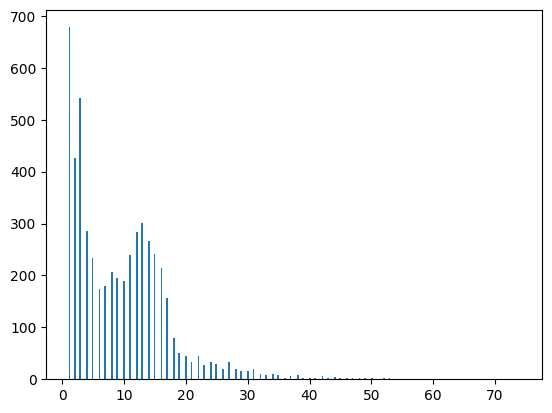

Number contours: 5378


False

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

segmented = cv2.imread('Output/1/2/mahalanobis_segmented.png')
img = cv2.imread('Images/EB-02-660_0594_0344.JPG')
segmented = cv2.cvtColor(segmented, cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(segmented, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# Get the width, height and position of each contour
width = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    width.append(w)
    cv2.circle(img, (x,y), 10, (0, 0, 255), 2)

# Print histogram of size
plt.figure()
plt.hist(width,bins=255)
plt.show()

print("Number contours: %d" % len(contours))
cv2.imwrite("Output/2/1/circle_pumpkins.png", img)

## Exercise 3.2.2
Filter the segmented image to remove noise.

## Exercise 3.2.3
Count the number of orange blobs in the filtered image.

## Exercise 3.2.4
Mark the located pumpkins in the input image. This
step is for debugging purposes and to convince others
that you have counted the pumpkins accurately.

# 3.3 Generate an orthomosaic
This part deals with orthorectifying multiple images
of the same field into a single carthometric product.
Choose proper settings for all below processes, taking into consideration the available computing resources

## Exercise 3.3.1
Load data into Metashape.

## Exercise 3.3.2
Perform bundle adjustment (align photos) and check
results

## Exercise 3.3.3
Perform dense reconstruction

## Exercise 3.3.4
Create digital elevation model

## Exercise 3.3.5
Create orthomosaic

## Exercise 3.3.6
Limit orthomosaic to pumpkin field

# 3.4 Count in orthomosaic
Use the python package rasterio to perform operations on the orthomosaic using a tile based approach.

## Exercise 3.4.1
Create code that only loads parts of the orthomosaic.

## Exercise 3.4.2
Design tile placement incl. overlaps.

## Exercise 3.4.3
Count pumpkins in each tile.

## Exercise 3.4.4
Deal with pumpkins in the overlap, so they are only
counted once.

## Exercise 3.4.5
Determine amount of pumpkins in the entire field

# 3.5 Endnotes
Reflect on the conducted work in this miniproject.

## Exercise 3.5.1
Determine GSD and size of the image field. What is
the average number of pumpkins per area?

## Exercise 3.5.2
Reflect on whether the developed system is ready to
help a farmer with the task of estimating the number
of pumpkins in a field.